In [ ]:
import polars as pl
from polars import col
from libs.misc import *
from libs.misc import load_and_clean_data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/home/sharens/projects/python/ml_chembl/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
RAW_PATH = 'libs/datasets/chembl_selected_ds.parquet'

In [5]:
df = pl.scan_parquet(RAW_PATH)

In [6]:
df.fetch(5)

/tmp/ipykernel_8390/45131725.py:1: DeprecationWarning: `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  df.fetch(5)


activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,pchembl_value,target_chembl_id,target_name
u32,u32,str,f64,f32,u8,u8,f32,u8,u8,f32,f32,str,str,f32,str,str
579288,49931,"""CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc…",454.45,0.27,10,5,210.539993,9,3,0.29,8.8,"""nM""","""IC50""",8.06,"""CHEMBL614508""","""143B"""
865583,3133,"""O=C1OC(=O)C2C3CCC(O3)C12""",168.15,-0.14,4,0,52.599998,0,0,0.37,43000.0,"""nM""","""IC50""",4.37,"""CHEMBL614508""","""143B"""
881843,69448,"""C[C@@]12C(=O)OC(=O)[C@]1(C)[C@…",196.2,0.64,4,0,52.599998,0,0,0.42,10000.0,"""nM""","""IC50""",5.0,"""CHEMBL614508""","""143B"""
602041,144846,"""CCCC(=O)Oc1ccc(C[C@@H](C)[C@@H…",582.73,7.57,8,0,105.199997,17,2,0.14,300.0,"""nM""","""AC50""",6.52,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…"
602045,144716,"""CC(C)CC(=O)Oc1ccc(C[C@@H](C)[C…",638.84,8.55,8,0,105.199997,17,2,0.13,200.0,"""nM""","""AC50""",6.7,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…"


In [7]:
df_limited = df.collect().slice(0, 100000)

In [8]:
df_limited.describe()

statistic,activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,pchembl_value,target_chembl_id,target_name
str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,str
"""count""",100000.0,100000.0,"""100000""",100000.0,98013.0,98013.0,98013.0,98013.0,98013.0,98013.0,98013.0,100000.0,"""100000""","""100000""",100000.0,"""100000""","""100000"""
"""null_count""",0.0,0.0,"""0""",0.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,0.0,"""0""","""0""",0.0,"""0""","""0"""
"""mean""",677161.99444,226222.17957,null,440.007449,3.43907,5.381776,2.04881,91.323341,6.524369,2.481569,0.487719,5108.783691,null,null,6.675375,null,null
"""std""",363161.204303,313816.238978,null,222.166017,2.037255,2.578379,1.800362,53.545769,4.421479,1.235461,0.224306,13977.692383,null,null,1.373816,null,null
"""min""",31864.0,97.0,"""Br.Br.Br.Br.C#CCNCCCNCCCNCCCNC…",60.05,-8.9,0.0,0.0,0.0,0.0,0.0,0.01,0.000001,"""nM""","""AC50""",3.72,"""CHEMBL1781""","""1-87 tumor cell line"""
"""25%""",367024.0,82547.0,null,328.41,2.34,4.0,1.0,55.119999,3.0,2.0,0.31,22.0,null,null,5.62,null,null
"""50%""",670531.0,156858.0,null,408.45,3.55,5.0,2.0,81.010002,6.0,2.0,0.49,245.470001,null,null,6.61,null,null
"""75%""",997768.0,235349.0,null,498.58,4.69,7.0,3.0,115.040001,9.0,3.0,0.67,2400.0,null,null,7.66,null,null
"""max""",1.308766e6,2.882634e6,"""c1ncc(Cc2ccc(OCCN3CCCC3)cc2)s1""",4767.56,15.53,27.0,15.0,536.48999,44.0,10.0,0.95,189000.0,"""nM""","""Potency""",14.92,"""CHEMBL614997""","""fMet-Leu-Phe receptor"""


In [9]:
df_unit = impute_units(df_limited, value_col="standard_value", units_col="standard_units")

In [10]:
df_calc = compute_pIC50(df_unit)
df_calc.head()

activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,pchembl_value,target_chembl_id,target_name,units_imputed,pIC50
u32,u32,str,f64,f32,u8,u8,f32,u8,u8,f32,f32,str,str,f32,str,str,bool,f32
579288,49931,"""CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc…",454.45,0.27,10,5,210.539993,9,3,0.29,8.8,"""nM""","""IC50""",8.06,"""CHEMBL614508""","""143B""",false,8.055517
865583,3133,"""O=C1OC(=O)C2C3CCC(O3)C12""",168.15,-0.14,4,0,52.599998,0,0,0.37,43000.0,"""nM""","""IC50""",4.37,"""CHEMBL614508""","""143B""",false,4.366532
881843,69448,"""C[C@@]12C(=O)OC(=O)[C@]1(C)[C@…",196.2,0.64,4,0,52.599998,0,0,0.42,10000.0,"""nM""","""IC50""",5.0,"""CHEMBL614508""","""143B""",false,5.0
602041,144846,"""CCCC(=O)Oc1ccc(C[C@@H](C)[C@@H…",582.73,7.57,8,0,105.199997,17,2,0.14,300.0,"""nM""","""AC50""",6.52,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…",false,6.522879
602045,144716,"""CC(C)CC(=O)Oc1ccc(C[C@@H](C)[C…",638.84,8.55,8,0,105.199997,17,2,0.13,200.0,"""nM""","""AC50""",6.7,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…",false,6.69897


In [11]:
# Zaokrąglanie Pica
df_calc = df_calc.with_columns(
    pl.col("pIC50")
    .round(2)                 # Najpierw naprawiamy błąd precyzji float
    .cast(pl.Decimal(None, 2)) # Potem blokujemy na 2 miejscach po przecinku
)

In [12]:
df_calc.head()

activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,pchembl_value,target_chembl_id,target_name,units_imputed,pIC50
u32,u32,str,f64,f32,u8,u8,f32,u8,u8,f32,f32,str,str,f32,str,str,bool,"decimal[38,2]"
579288,49931,"""CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc…",454.45,0.27,10,5,210.539993,9,3,0.29,8.8,"""nM""","""IC50""",8.06,"""CHEMBL614508""","""143B""",false,8.06
865583,3133,"""O=C1OC(=O)C2C3CCC(O3)C12""",168.15,-0.14,4,0,52.599998,0,0,0.37,43000.0,"""nM""","""IC50""",4.37,"""CHEMBL614508""","""143B""",false,4.37
881843,69448,"""C[C@@]12C(=O)OC(=O)[C@]1(C)[C@…",196.2,0.64,4,0,52.599998,0,0,0.42,10000.0,"""nM""","""IC50""",5.0,"""CHEMBL614508""","""143B""",false,5.00
602041,144846,"""CCCC(=O)Oc1ccc(C[C@@H](C)[C@@H…",582.73,7.57,8,0,105.199997,17,2,0.14,300.0,"""nM""","""AC50""",6.52,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…",false,6.52
602045,144716,"""CC(C)CC(=O)Oc1ccc(C[C@@H](C)[C…",638.84,8.55,8,0,105.199997,17,2,0.13,200.0,"""nM""","""AC50""",6.7,"""CHEMBL2903""","""Polyunsaturated fatty acid lip…",false,6.70


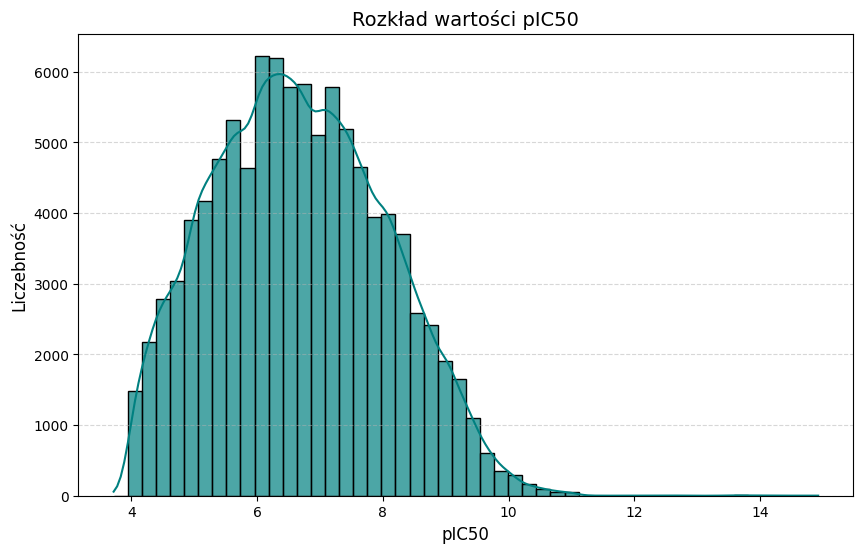

In [ ]:
# Pobieramy dane do wykresu, rzutując z Decimal na Float (wymagane przez matplotlib)
data_to_plot = df_calc.select(pl.col("pIC50").cast(pl.Float64)).to_series()

plt.figure(figsize=(10, 6))

# Rysowanie histogramu z linią gęstości (KDE)
sns.histplot(data_to_plot, bins=50, kde=True, color='teal', edgecolor='black', alpha=0.7)

plt.title('Rozkład wartości pIC50', fontsize=14)
plt.xlabel('pIC50', fontsize=12)
plt.ylabel('Liczebność', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [11]:
# False bo źle sie zaokrągla
df_calc["pchembl_value"].cast(pl.Decimal(scale=2)).equals(df_calc["pIC50"].cast(pl.Decimal(scale=2)))

False

In [12]:
RANDOM_SEED = 42
N_VALUE = 100000
EPOCH_NUM = 50
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
# --- PRZYGOTOWANIE DANYCH ---
RAW_PATH = 'libs/datasets/chembl_selected_ds.parquet' # Ścieżka do pliku
df = load_and_clean_data(RAW_PATH, N_VALUE, RANDOM_SEED)

smiles = df["canonical_smiles"].to_list()
targets = df["pIC50"].to_numpy()

# Dzielimy dane (najlepiej używać Scaffold Split w chemii, tu dla uproszczenia Random Split)
X_smiles_train, X_smiles_test, y_train, y_test = train_test_split(smiles, targets, test_size=0.2, random_state=42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Używane urządzenie: {device}")

# === ŚCIEŻKA 1: SZKOLENIE MLP (na Fingerprintach) ===
print("\n=== Rozpoczynanie ścieżki MLP ===")

# Generowanie features
X_fp_train, idx_train = generate_fingerprints(X_smiles_train)
y_train_mlp = y_train[idx_train]

X_fp_test, idx_test = generate_fingerprints(X_smiles_test)
y_test_mlp = y_test[idx_test]

# DataLoaders
train_dataset_mlp = MoleculeDatasetMLP(X_fp_train, y_train_mlp)
test_dataset_mlp = MoleculeDatasetMLP(X_fp_test, y_test_mlp)
train_loader_mlp = DataLoader(train_dataset_mlp, batch_size=64, shuffle=True)
test_loader_mlp = DataLoader(test_dataset_mlp, batch_size=64)

# Inicjalizacja MLP
mlp_model = BioActivityMLP().to(device)
optimizer_mlp = torch.optim.Adam(mlp_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Trening MLP
print("Trenowanie MLP...")
mlp_model.train()
for epoch in range(EPOCH_NUM): # Zwiększ liczbę epok dla lepszych wyników
    total_loss = 0
    for X_batch, y_batch in train_loader_mlp:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer_mlp.zero_grad()
        output = mlp_model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer_mlp.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader_mlp):.4f}")

Ładowanie i czyszczenie danych...
Dane po oczyszczeniu: (85654, 19)
Używane urządzenie: cuda

=== Rozpoczynanie ścieżki MLP ===


Generowanie fingerprintów: 100%|██████████| 17131/17131 [00:03<00:00, 5081.99it/s]


Trenowanie MLP...
Epoch 1, Loss: 1.8810
Epoch 2, Loss: 1.2700
Epoch 3, Loss: 1.1387
Epoch 4, Loss: 1.0425
Epoch 5, Loss: 0.9751
Epoch 6, Loss: 0.9098
Epoch 7, Loss: 0.8587
Epoch 8, Loss: 0.8085
Epoch 9, Loss: 0.7678
Epoch 10, Loss: 0.7279
Epoch 11, Loss: 0.6901
Epoch 12, Loss: 0.6529
Epoch 13, Loss: 0.6279
Epoch 14, Loss: 0.5988
Epoch 15, Loss: 0.5797
Epoch 16, Loss: 0.5606
Epoch 17, Loss: 0.5477
Epoch 18, Loss: 0.5240
Epoch 19, Loss: 0.5014
Epoch 20, Loss: 0.4994
Epoch 21, Loss: 0.4836
Epoch 22, Loss: 0.4754
Epoch 23, Loss: 0.4662
Epoch 24, Loss: 0.4494
Epoch 25, Loss: 0.4372
Epoch 26, Loss: 0.4299
Epoch 27, Loss: 0.4227
Epoch 28, Loss: 0.4174
Epoch 29, Loss: 0.4066
Epoch 30, Loss: 0.3969
Epoch 31, Loss: 0.3937
Epoch 32, Loss: 0.3835
Epoch 33, Loss: 0.3812
Epoch 34, Loss: 0.3740
Epoch 35, Loss: 0.3678
Epoch 36, Loss: 0.3665
Epoch 37, Loss: 0.3588
Epoch 38, Loss: 0.3589
Epoch 39, Loss: 0.3522
Epoch 40, Loss: 0.3455
Epoch 41, Loss: 0.3408
Epoch 42, Loss: 0.3381
Epoch 43, Loss: 0.3368
Ep

In [14]:
# === ŚCIEŻKA 2: SZKOLENIE GNN (na Grafach) ===
print("\n=== Rozpoczynanie ścieżki GNN ===")

# Konwersja do obiektów Data
train_graphs = []
for s, y in zip(X_smiles_train, y_train):
    g = smile_to_graph(s, y)
    if g: train_graphs.append(g)

test_graphs = []
for s, y in zip(X_smiles_test, y_test):
    g = smile_to_graph(s, y)
    if g: test_graphs.append(g)

# GeoDataLoader obsługuje batchowanie grafów o różnych rozmiarach
train_loader_gnn = GeoDataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader_gnn = GeoDataLoader(test_graphs, batch_size=64)

# Inicjalizacja GNN
gnn_model = BioActivityGNN(node_features_dim=13).to(device)
optimizer_gnn = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

# Trening GNN
print("Trenowanie GNN...")
gnn_model.train()
for epoch in range(EPOCH_NUM):
    total_loss = 0
    for batch in train_loader_gnn:
        batch = batch.to(device)
        optimizer_gnn.zero_grad()
        output = gnn_model(batch)
        loss = criterion(output, batch.y.view(-1, 1))
        loss.backward()
        optimizer_gnn.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader_gnn):.4f}")

# === EWALUACJA (Przykład dla GNN) ===
gnn_model.eval()
preds = []
actuals = []
with torch.no_grad():
    for batch in test_loader_gnn:
        batch = batch.to(device)
        out = gnn_model(batch)
        preds.extend(out.cpu().numpy().flatten())
        actuals.extend(batch.y.cpu().numpy().flatten())

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(actuals, preds))
r2 = r2_score(actuals, preds)

print(f"\nWyniki GNN na zbiorze testowym:")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


=== Rozpoczynanie ścieżki GNN ===
Trenowanie GNN...
Epoch 1, Loss: 2.1869
Epoch 2, Loss: 1.7389
Epoch 3, Loss: 1.7079
Epoch 4, Loss: 1.6872
Epoch 5, Loss: 1.6759
Epoch 6, Loss: 1.6579
Epoch 7, Loss: 1.6495
Epoch 8, Loss: 1.6282
Epoch 9, Loss: 1.6214
Epoch 10, Loss: 1.6092
Epoch 11, Loss: 1.6030
Epoch 12, Loss: 1.5940
Epoch 13, Loss: 1.5916
Epoch 14, Loss: 1.5823
Epoch 15, Loss: 1.5841
Epoch 16, Loss: 1.5824
Epoch 17, Loss: 1.5761
Epoch 18, Loss: 1.5685
Epoch 19, Loss: 1.5608
Epoch 20, Loss: 1.5611
Epoch 21, Loss: 1.5544
Epoch 22, Loss: 1.5509
Epoch 23, Loss: 1.5429
Epoch 24, Loss: 1.5420
Epoch 25, Loss: 1.5386
Epoch 26, Loss: 1.5326
Epoch 27, Loss: 1.5251
Epoch 28, Loss: 1.5193
Epoch 29, Loss: 1.5193
Epoch 30, Loss: 1.5088
Epoch 31, Loss: 1.5127
Epoch 32, Loss: 1.5023
Epoch 33, Loss: 1.5015
Epoch 34, Loss: 1.4963
Epoch 35, Loss: 1.4952
Epoch 36, Loss: 1.4851
Epoch 37, Loss: 1.4883
Epoch 38, Loss: 1.4811
Epoch 39, Loss: 1.4755
Epoch 40, Loss: 1.4747
Epoch 41, Loss: 1.4761
Epoch 42, Los